In [1]:
from pycocotools.coco import COCO
import numpy as np
import json
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
from pycocotools.mask import decode, frPyObjects
from tqdm import tqdm
from PIL import Image
import os
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [2]:
datasetPath = '/home/quantum/Documents/datasets/coco/'

mode = 'val'

if mode == 'val':
    annFile = 'annotations/instances_val2017.json'
    imagesPath = 'val/images'
    masksPath = 'val/masks'
elif mode == 'train':
    annFile = 'annotations/instances_train2017.json'
    imagesPath = 'train/images'
    masksPath = 'train/masks'

In [3]:
# initialize COCO api for instance annotations
coco=COCO(os.path.join(datasetPath, annFile))

loading annotations into memory...
Done (t=0.61s)
creating index...
index created!


In [4]:
classes = ['cup', 'laptop', 'cell phone']

In [5]:
catIds = coco.getCatIds(catNms=classes)

In [6]:
catIdsNumber = {}
for idx, catId  in enumerate(catIds):
    catIdsNumber[catId] = idx + 1

In [7]:
catIdsNumber

{47: 1, 73: 2, 77: 3}

In [8]:
imgIds = set()

for val in catIds:
    categoryImgIds = coco.getImgIds(catIds=val)
    for imgId in categoryImgIds:
        imgIds.add(imgId)

In [9]:
images = coco.loadImgs(list(imgIds))

In [10]:
images[0]

{u'coco_url': u'http://images.cocodataset.org/val2017/000000555009.jpg',
 u'date_captured': u'2013-11-23 20:14:23',
 u'file_name': u'000000555009.jpg',
 u'flickr_url': u'http://farm1.staticflickr.com/22/30339463_78c837ba54_z.jpg',
 u'height': 375,
 u'id': 555009,
 u'license': 5,
 u'width': 500}

In [10]:
len(images)

15323

In [ ]:
for image in tqdm(images):
    annIds = coco.getAnnIds(imgIds=image['id'], catIds=catIds, iscrowd=None)
    anns = coco.loadAnns(annIds)
    resulting_mask = np.zeros((image['height'], image['width']), dtype='uint8')
    masked = np.zeros((image['height'], image['width']), dtype='uint8')
    for annotation in anns:
        if type(annotation['segmentation']) == list:
            # polygons
            mask = decode(frPyObjects([annotation['segmentation'][0]], image['height'], image['width']))
        else:
            # rle
            if type(annotation['segmentation']['counts']) == list:
                mask = decode(frPyObjects([annotation['segmentation']], image['height'], image['width']))
            else:   
                mask = decode([ann['segmentation']])
        mask = mask[:,:,0]
        resulting_mask += mask * catIdsNumber[annotation['category_id']]
        resulting_mask -= np.logical_and(masked, mask).astype('uint8') * catIdsNumber[annotation['category_id']]
        masked = np.logical_or(masked, mask)
    if resulting_mask.max() > 3:
        break
    np.save(os.path.join(datasetPath, masksPath, "{0}.npy".format(image['file_name'].split('.')[0])), resulting_mask)


 59%|█████▉    | 9100/15323 [00:45<00:32, 189.62it/s]

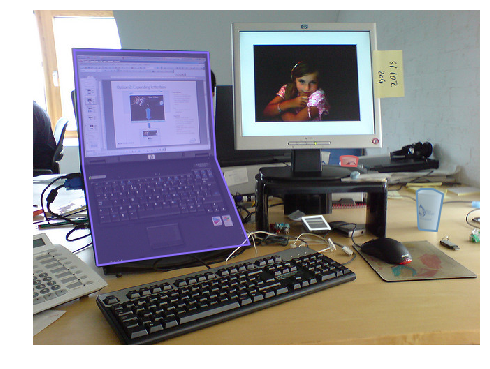

In [50]:
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [83]:
from metrics import dice_coef
import keras

In [85]:

for image_name in os.listdir(dataset_path):
    image = cv2.imread(os.path.join(dataset_path, image_name))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    cv2_resized = cv2.resize(image, (256, 256), interpolation = cv2.INTER_LINEAR)
    result = fast_scnn.predict(cv2_resized.reshape((1,256,256,3)))
    print(result.shape)
    mask = keras.utils.to_categorical(np.load(os.path.join('/home/quantum/Documents/datasets/coco-test/val/masks', "{0}.npy".format(image_name.split('.')[0]))), num_classes=4)
#     print(dice_coef(mask, result))

(1, 256, 256, 4)
(1, 256, 256, 4)
(1, 256, 256, 4)
(1, 256, 256, 4)
(1, 256, 256, 4)
(1, 256, 256, 4)
(1, 256, 256, 4)
(1, 256, 256, 4)
(1, 256, 256, 4)
(1, 256, 256, 4)
(1, 256, 256, 4)
(1, 256, 256, 4)
(1, 256, 256, 4)
(1, 256, 256, 4)
(1, 256, 256, 4)
(1, 256, 256, 4)
(1, 256, 256, 4)
(1, 256, 256, 4)
(1, 256, 256, 4)
